In [ ]:
# The execution is simple. Run every cell one by one.

In [15]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install numpy
!pip install keras
!pip install tensorflow


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/1.1 MB ? eta -:--:--
     --                                       0.1/1.1 MB 1.7 MB/s eta 0:00:01
     -------                                  0.2/1.1 MB 2.8 MB/s eta 0:00:01
     ---------------                          0.5/1.1 MB 3.5 MB/s eta 0:00:01
     -------------------------                0.7/1.1 MB 4.1 MB/s eta 0:00:01
     --------------------------------         0.9/1.1 MB 4.2 MB/s eta 0:00:01
     --------------------------------------   1.1/1.1 MB 4.2 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 4.0 MB/s eta 0:00:00
                                              0.0/133.7 kB ? eta -:--:--
     -------------------------------------- 133.7/133.7 kB 8.2 MB/s eta 0:00:00
                                              0.0/242.1 kB ? eta -:--:--
     ------------------------------------- 242.1/242.1 kB 14.5 MB/s eta 0:00:00
                                              0.0/3.0 MB ? eta -:--:--
     -


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

ModuleNotFoundError: No module named 'tensorflow'

In [5]:
gstock_data = pd.read_csv('goog.csv')
gstock_data .head()

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


In [6]:
print(gstock_data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [7]:
# Inspect the first few rows to understand the data structure
print(gstock_data.head())


         Date        Open        High         Low       Close   Volume
0  12/19/2016  790.219971  797.659973  786.270020  794.200012  1225900
1  12/20/2016  796.760010  798.650024  793.270020  796.419983   925100
2  12/21/2016  795.840027  796.676025  787.099976  794.559998  1208700
3  12/22/2016  792.359985  793.320007  788.580017  791.260010   969100
4  12/23/2016  790.900024  792.739990  787.280029  789.909973   623400


In [8]:
# Assuming gstock_data is already loaded as a DataFramea
gstock_data = gstock_data[['Date', 'Open', 'Close']]

# Convert the 'date' column to datetime, ensuring only the date part is taken
gstock_data['Date'] = pd.to_datetime(gstock_data['Date'].apply(lambda x: x.split()[0]))

# Set the 'date' column as the index
gstock_data.set_index('Date', drop=True, inplace=True)

# Display the first few rows of the DataFrame
gstock_data.head()


,Open,Close
Date,,
2016-12-19,790.219971,794.200012
2016-12-20,796.760010,796.419983
2016-12-21,795.840027,794.559998
2016-12-22,792.359985,791.260010
2016-12-23,790.900024,789.909973


C:\Users\moudg\AppData\Local\Temp\ipykernel_13032\3151383347.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fg.show()


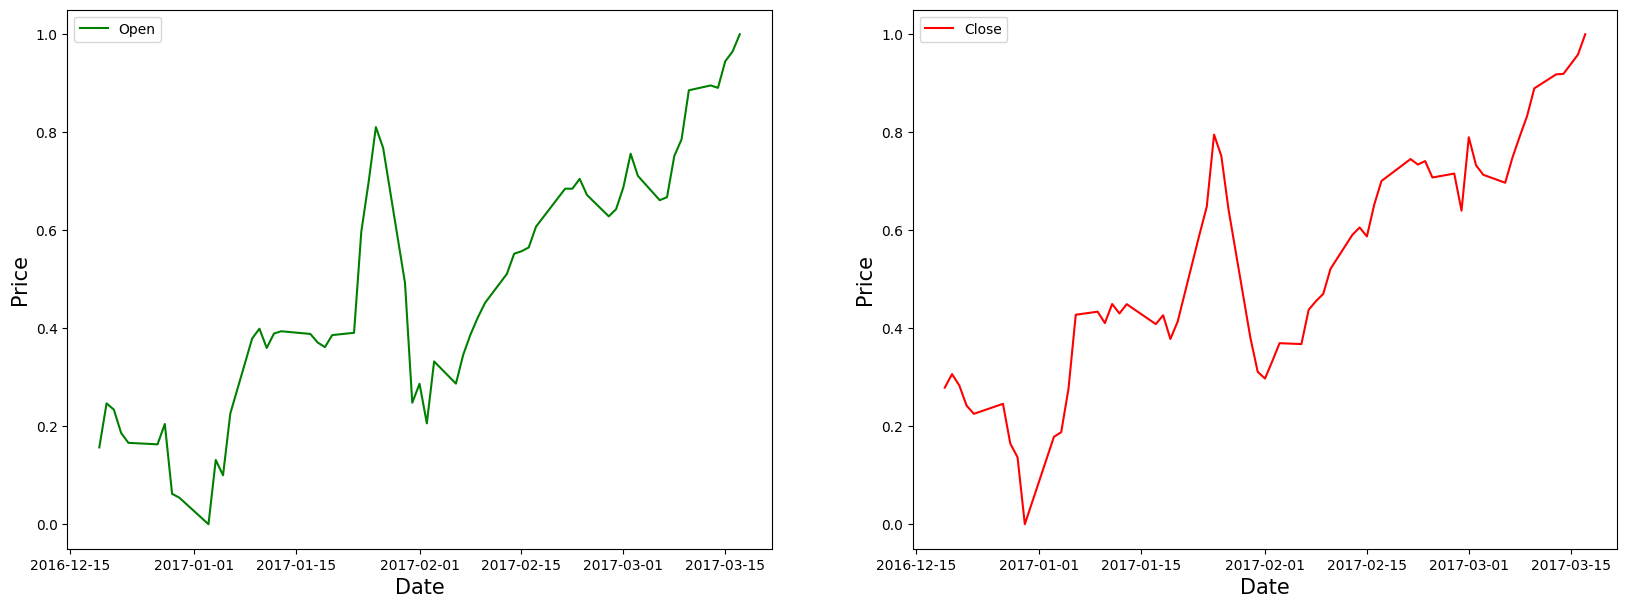

In [11]:

fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(gstock_data ['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()
ax[1].plot(gstock_data ['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()
fg.show()

In [13]:
Ms = MinMaxScaler()
gstock_data[gstock_data.columns] = Ms.fit_transform(gstock_data)

training_size = round(len(gstock_data) * 0.80)

train_data = gstock_data[:training_size]
test_data  = gstock_data[training_size:]

def create_sequence(dataset):
    sequences = []
    labels = []
    start_idx = 0
    for stop_idx in range(50, len(dataset)):
        sequences.append(dataset.iloc[start_idx:stop_idx].values)
        labels.append(dataset.iloc[stop_idx].values)
        start_idx += 1
    return (np.array(sequences), np.array(labels))

train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [26]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Assuming gstock_data is already defined and is a pandas DataFrame

Ms = MinMaxScaler()
gstock_data[gstock_data.columns] = Ms.fit_transform(gstock_data)

training_size = round(len(gstock_data) * 0.80)

train_data = gstock_data[:training_size]
test_data = gstock_data[training_size:]

def create_sequence(dataset, seq_length=5):  # Reduced sequence length to 5
    sequences = []
    labels = []
    start_idx = 0
    
    # Print the length of the dataset
    print("Length of dataset:", len(dataset))
    
    for stop_idx in range(seq_length, len(dataset)):
        # Print the indices
        print(f"start_idx: {start_idx}, stop_idx: {stop_idx}")
        
        sequences.append(dataset.iloc[start_idx:stop_idx].values)
        labels.append(dataset.iloc[stop_idx].values)
        start_idx += 1
    
    print("Total sequences created:", len(sequences))
    return (np.array(sequences), np.array(labels))

train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

print("Shape of train_seq after sequence creation:", train_seq.shape)

from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_seq.shape[1], train_seq.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(units=50))
model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()


Length of dataset: 49
start_idx: 0, stop_idx: 5
start_idx: 1, stop_idx: 6
start_idx: 2, stop_idx: 7
start_idx: 3, stop_idx: 8
start_idx: 4, stop_idx: 9
start_idx: 5, stop_idx: 10
start_idx: 6, stop_idx: 11
start_idx: 7, stop_idx: 12
start_idx: 8, stop_idx: 13
start_idx: 9, stop_idx: 14
start_idx: 10, stop_idx: 15
start_idx: 11, stop_idx: 16
start_idx: 12, stop_idx: 17
start_idx: 13, stop_idx: 18
start_idx: 14, stop_idx: 19
start_idx: 15, stop_idx: 20
start_idx: 16, stop_idx: 21
start_idx: 17, stop_idx: 22
start_idx: 18, stop_idx: 23
start_idx: 19, stop_idx: 24
start_idx: 20, stop_idx: 25
start_idx: 21, stop_idx: 26
start_idx: 22, stop_idx: 27
start_idx: 23, stop_idx: 28
start_idx: 24, stop_idx: 29
start_idx: 25, stop_idx: 30
start_idx: 26, stop_idx: 31
start_idx: 27, stop_idx: 32
start_idx: 28, stop_idx: 33
start_idx: 29, stop_idx: 34
start_idx: 30, stop_idx: 35
start_idx: 31, stop_idx: 36
start_idx: 32, stop_idx: 37
start_idx: 33, stop_idx: 38
start_idx: 34, stop_idx: 39
start_idx: 35

C:\Users\moudg\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 50)               │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,902 (120.71 KB)

 Trainable params: 30,902 (120.71 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# not working can remove easily
from sklearn.preprocessing import MinMaxScaler as MMS
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)
test_predicted = model.predict(test_seq)
test_inverse_predicted = MMS.inverse_transform(test_predicted)

Epoch 1/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - loss: 0.0114 - mean_absolute_error: 0.0813 - val_loss: 0.0463 - val_mean_absolute_error: 0.2113
Epoch 2/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.0101 - mean_absolute_error: 0.0767 - val_loss: 0.0308 - val_mean_absolute_error: 0.1710
Epoch 3/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0101 - mean_absolute_error: 0.0761 - val_loss: 0.0205 - val_mean_absolute_error: 0.1379
Epoch 4/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.0122 - mean_absolute_error: 0.0791 - val_loss: 0.0325 - val_mean_absolute_error: 0.1756
Epoch 5/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0108 - mean_absolute_error: 0.0794 - val_loss: 0.0468 - val_mean_absolute_error: 0.2119
Epoch 6/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0097 - mean_absolute_error: 0.0783 - val_loss: 0.0385 - val_mean_absolute_error: 0.1915
Epoch 7/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.0094 - mean_absolute_error: 0.0711 - val_loss: 0.0201 -

TypeError: MinMaxScaler.inverse_transform() missing 1 required positional argument: 'X'

In [30]:
# Instantiate the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training labels
scaler.fit(train_label.reshape(-1, 1))

# Train your model
model.fit(train_seq, train_label, epochs=80, validation_data=(test_seq, test_label), verbose=1)

# Predict the test sequences
test_predicted = model.predict(test_seq)

# Inverse transform the predictions
test_inverse_predicted = scaler.inverse_transform(test_predicted)

print(test_inverse_predicted)


Epoch 1/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - loss: 0.0070 - mean_absolute_error: 0.0652 - val_loss: 0.0418 - val_mean_absolute_error: 0.1990
Epoch 2/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0068 - mean_absolute_error: 0.0619 - val_loss: 0.0411 - val_mean_absolute_error: 0.1970
Epoch 3/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0083 - mean_absolute_error: 0.0671 - val_loss: 0.0265 - val_mean_absolute_error: 0.1561
Epoch 4/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0064 - mean_absolute_error: 0.0605 - val_loss: 0.0129 - val_mean_absolute_error: 0.1044
Epoch 5/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0081 - mean_absolute_error: 0.0660 - val_loss: 0.0138 - val_mean_absolute_error: 0.1091
Epoch 6/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0072 - mean_absolute_error: 0.0640 - val_loss: 0.0258 - val_mean_absolute_error: 0.1539
Epoch 7/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0073 - mean_absolute_error: 0.0617 - val_loss: 0.0363 - v

In [36]:
# Ensure gstock_data is sliced to the last 7 rows to match the predictions
gstock_data_sliced = gstock_data.iloc[-7:].copy()

# Create a DataFrame for the predicted data with correct index
predicted_df = pd.DataFrame(test_inverse_predicted, columns=['open_predicted', 'close_predicted'], index=gstock_data_sliced.index)

# Concatenate actual and predicted data
gs_slic_data = pd.concat([gstock_data_sliced, predicted_df], axis=1)

# Assuming 'scaler' is your MinMaxScaler instance
gs_slic_data[['Open', 'Close']] = scaler.inverse_transform(gs_slic_data[['Open', 'Close']])

print(gs_slic_data)


                Open     Close  open_predicted  close_predicted
Date                                                           
2017-03-09  0.636663  0.674794        0.612515         0.612187
2017-03-10  0.717707  0.720918        0.639156         0.631148
2017-03-13  0.725722  0.744030        0.669857         0.652583
2017-03-14  0.721715  0.744837        0.680183         0.659255
2017-03-15  0.765688  0.760784        0.674817         0.654969
2017-03-16  0.781719  0.776731        0.684373         0.663494
2017-03-17  0.810440  0.810440        0.696546         0.674039


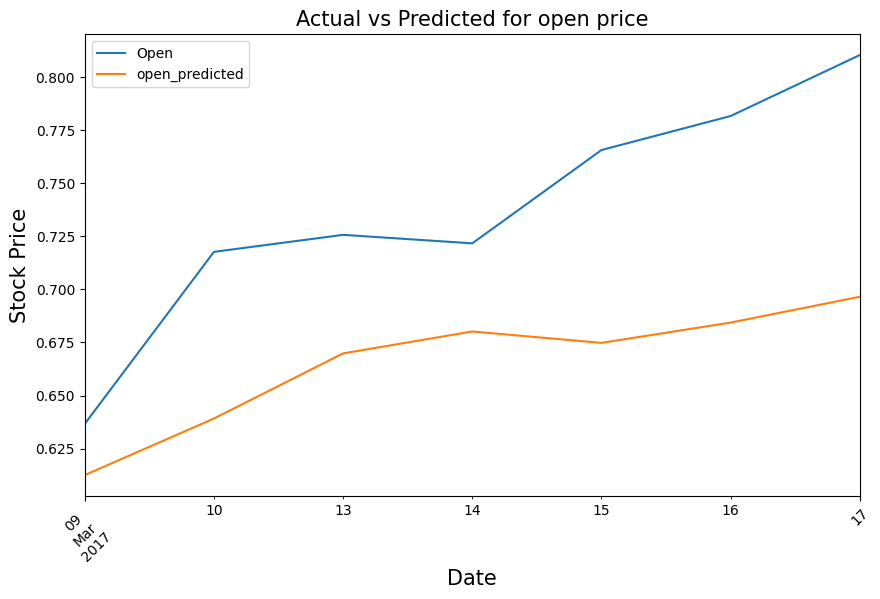

In [38]:
gs_slic_data[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

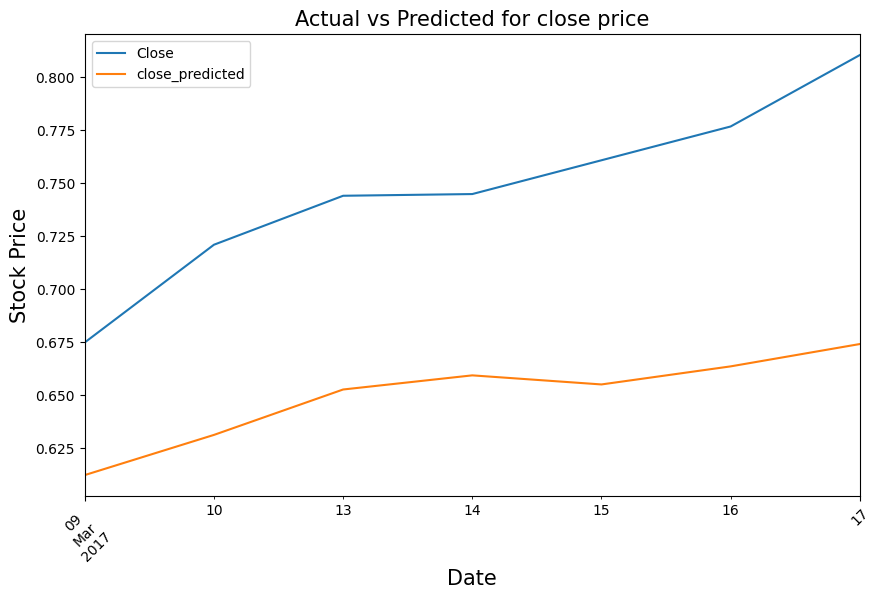

In [39]:
gs_slic_data[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()